<a href="https://www.kaggle.com/code/ishaqkhattak/house-price-prediction-using-ensemble-method?scriptVersionId=160675313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


> 1. Understanding Data

     Univariate Analysis
     
     Bi-variate Analysis

> 2. Data Preprocessing

     Removing redundant features
     
     Dealing with Outliers
     
     Filling Missing Values
     
> 3. Feature Engineering

> 5. Modeling

     Scaling of features
     
     Ensemble Algorithms

**NOTE: this notebook is complete in term of results and model implementation but currently working on improving the results.**

# 1. Understading data

In [2]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
#test2.shape, train2['SalePrice'].shape

In [4]:
test.shape, train.shape

((1459, 80), (1460, 81))

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


So, i have just seen few of NAN value which mean some values are empty.

In [6]:
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']]

In [7]:
X.shape,y.shape

((2919, 80), (1460, 1))

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

We do work on data differently based on thier type

In [9]:
numeric_ = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
numeric_.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_var = []
for i in numeric_.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

In [11]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
print(cont_num_var)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [13]:
cat_train = X.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = X['MSSubClass']   #MSSubClass is nominal
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

## 1.1 Neumerical feature

In case of neumerical feature we concern about the mean, median, mood and distribution type for this box plot is the best way to look at these perameters.

/tmp/ipykernel_19/300786857.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_.loc[:,col].dropna(), kde=False)


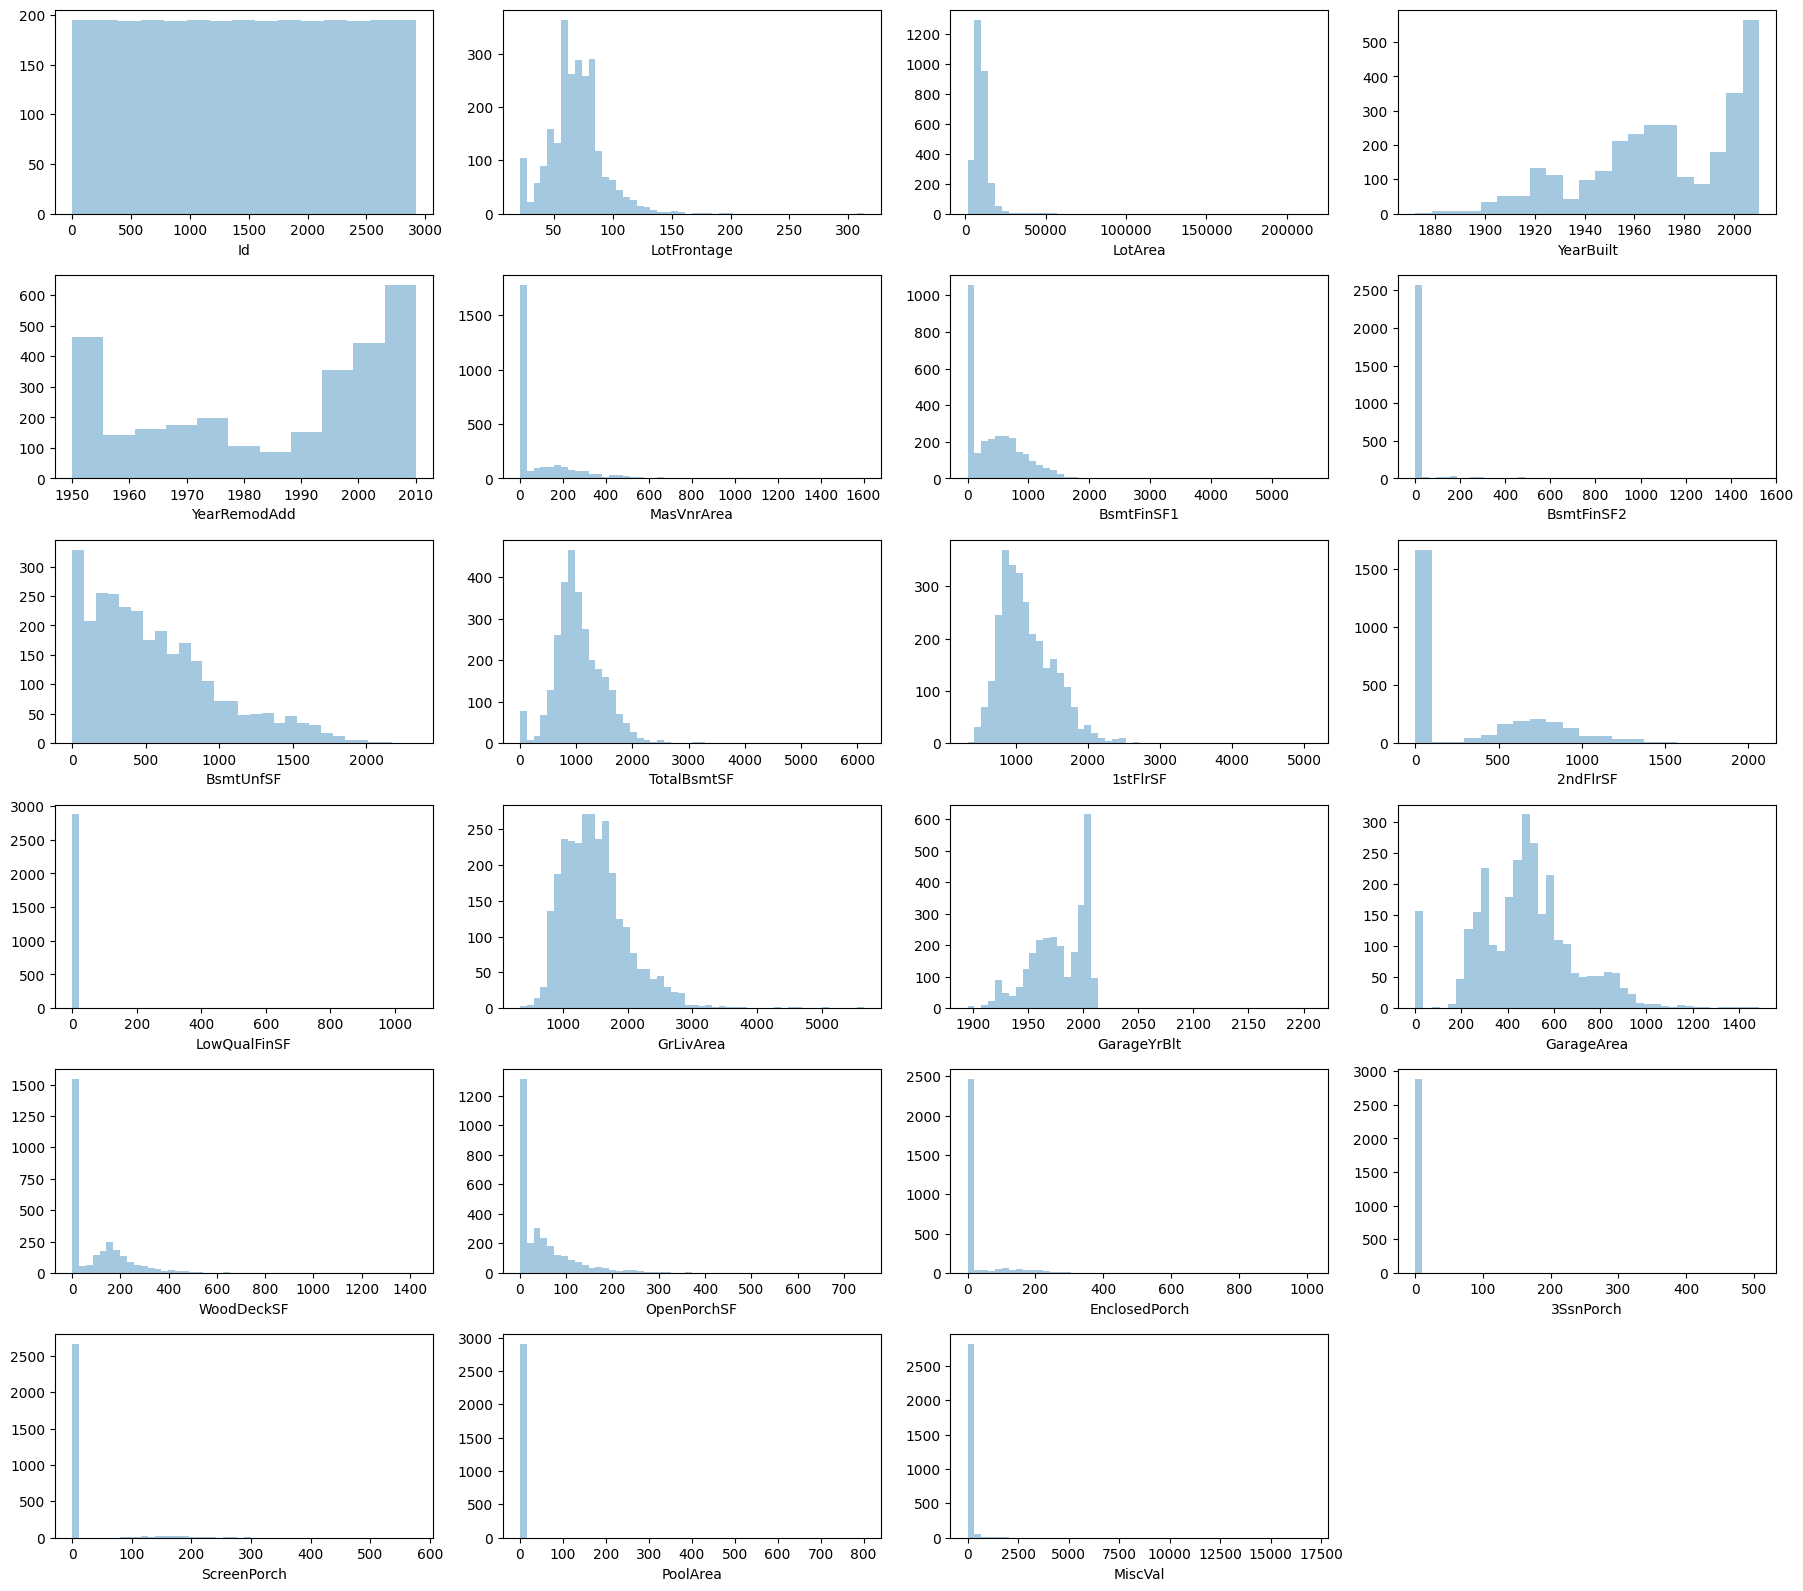

In [14]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

All these features are highly skewed (poolArea, screenporch, MiscVal), with mostly 0s. Having alot of 0s in the distribution doesnt really add information for predicting Housing Price. Hence, we will remove them during our preprocessing step
1. BsmtFinSF2
2. LowQualFinSF
3. EnclosedPorch
4. 3SsnPorch
5. ScreenPorch
6. PoolArea
7. MiscVal

The above columns have most of there enteries are zero so mark them for deletion later.

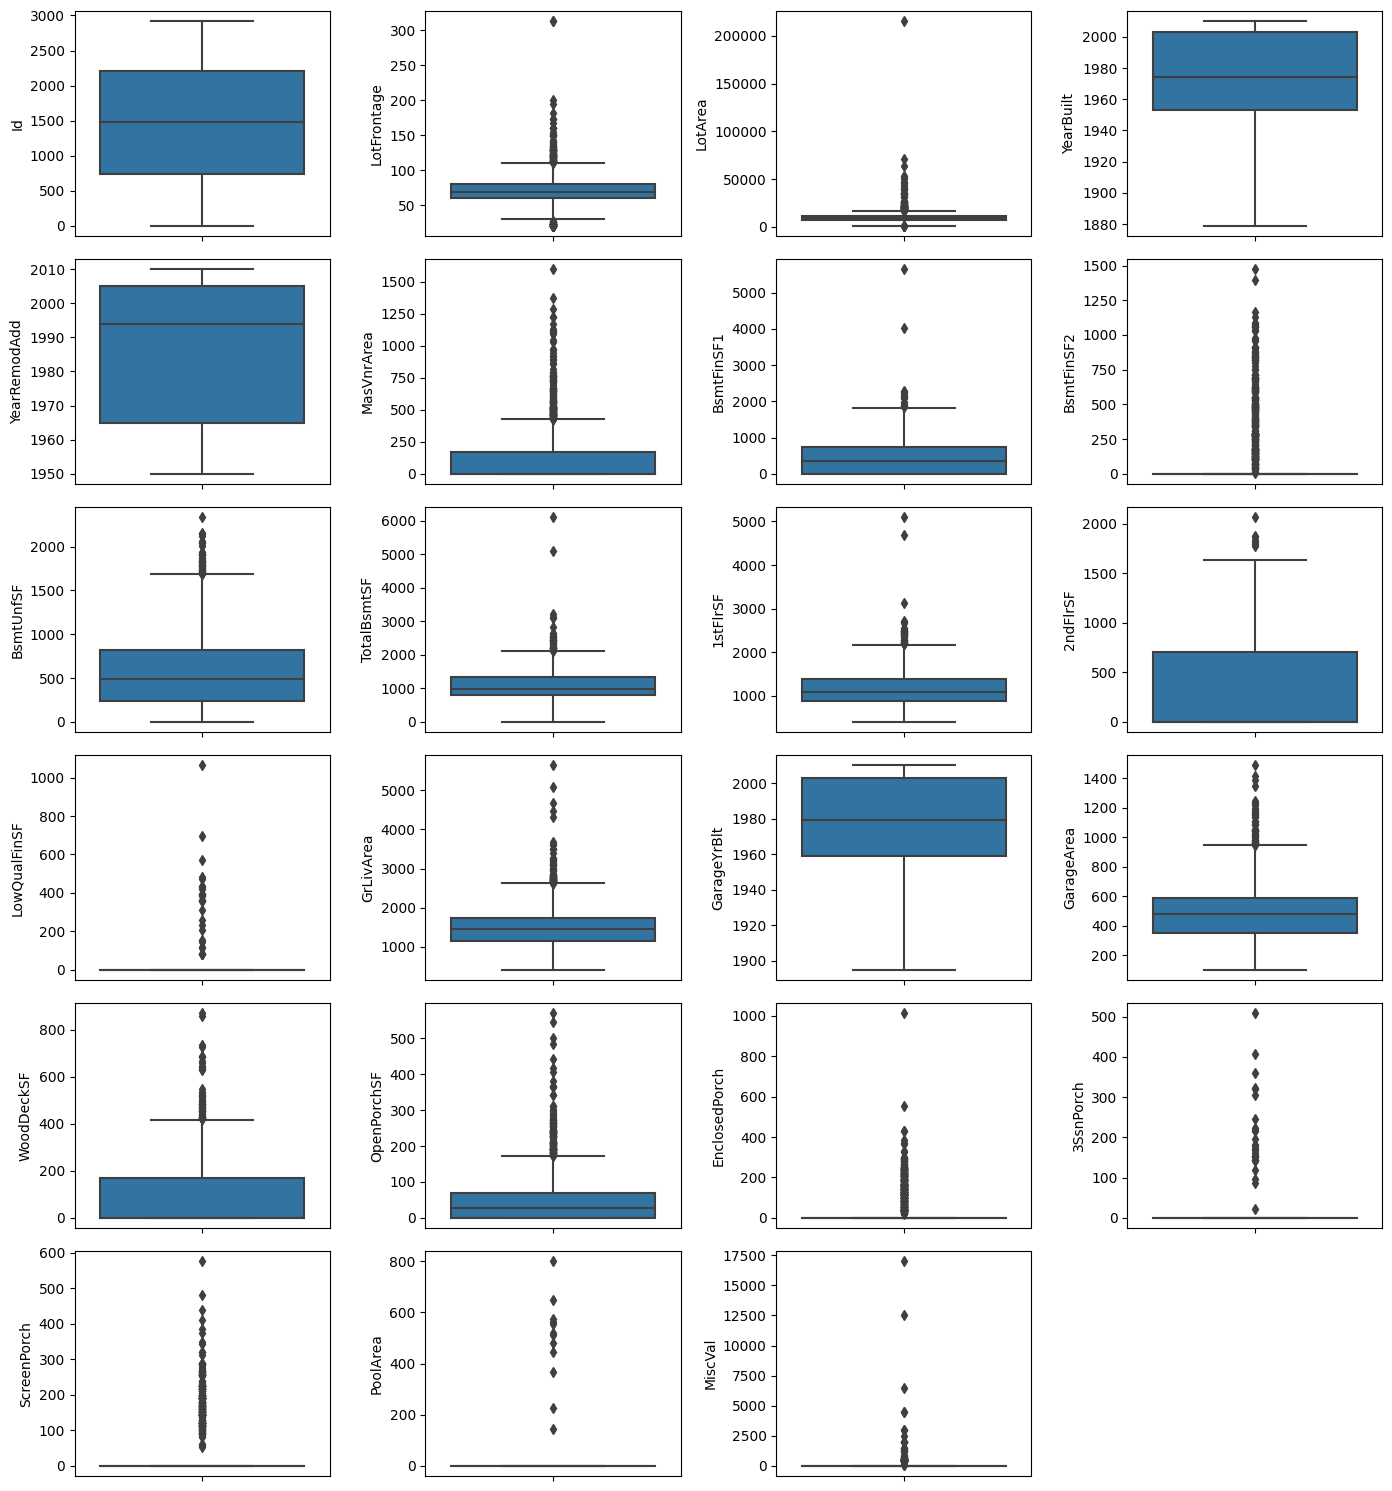

In [15]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

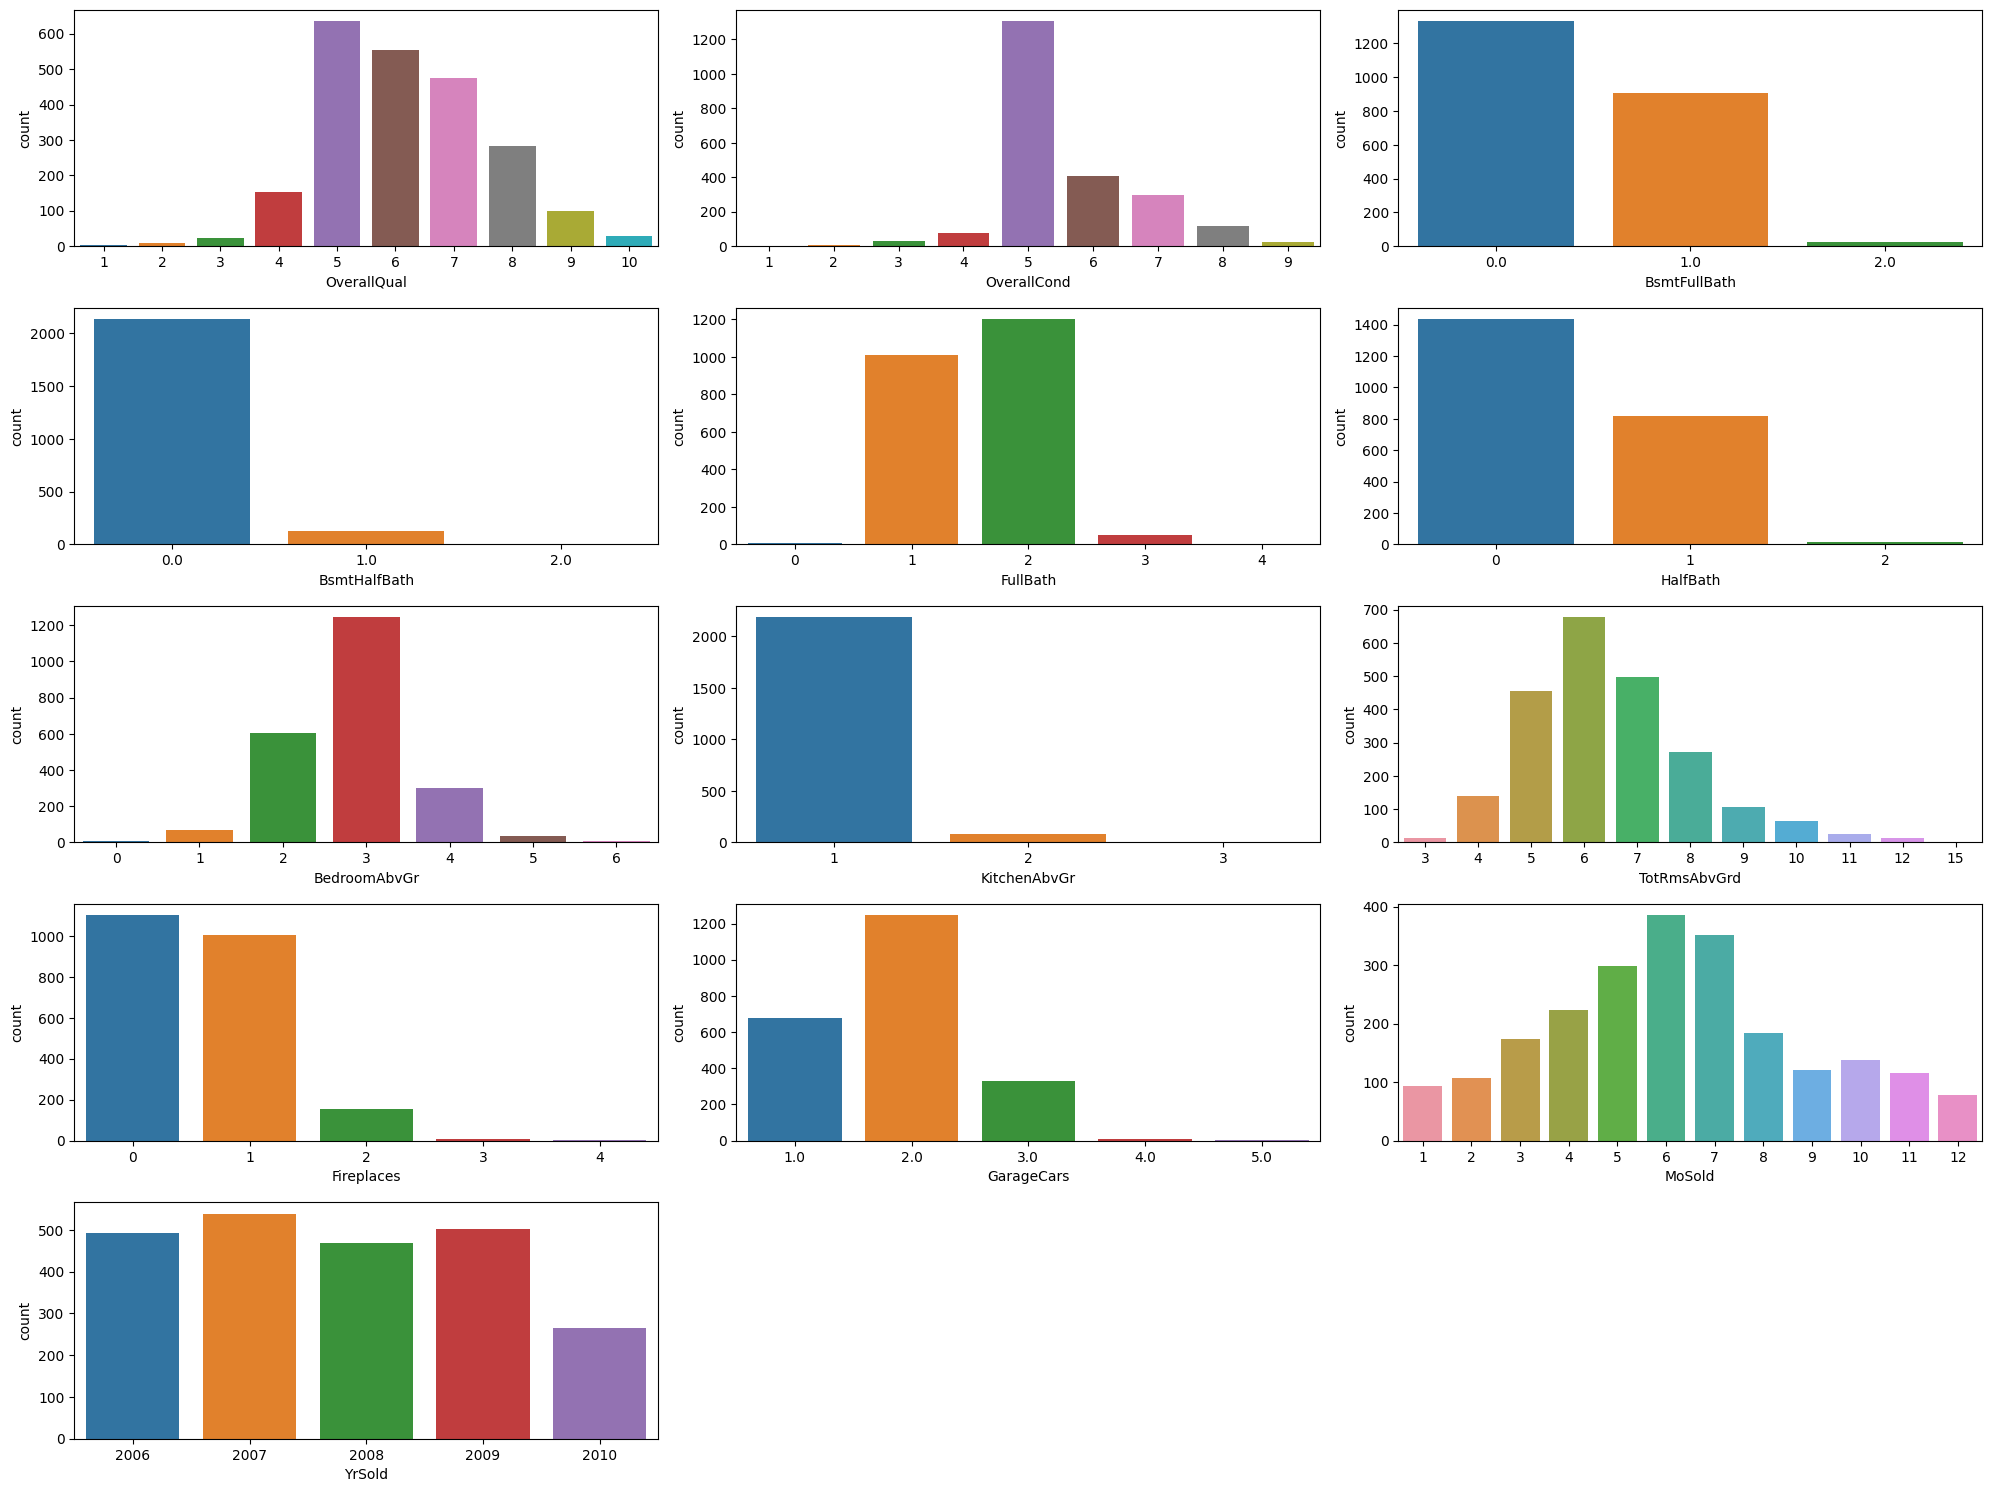

In [16]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

## 1.2 Categorical Features

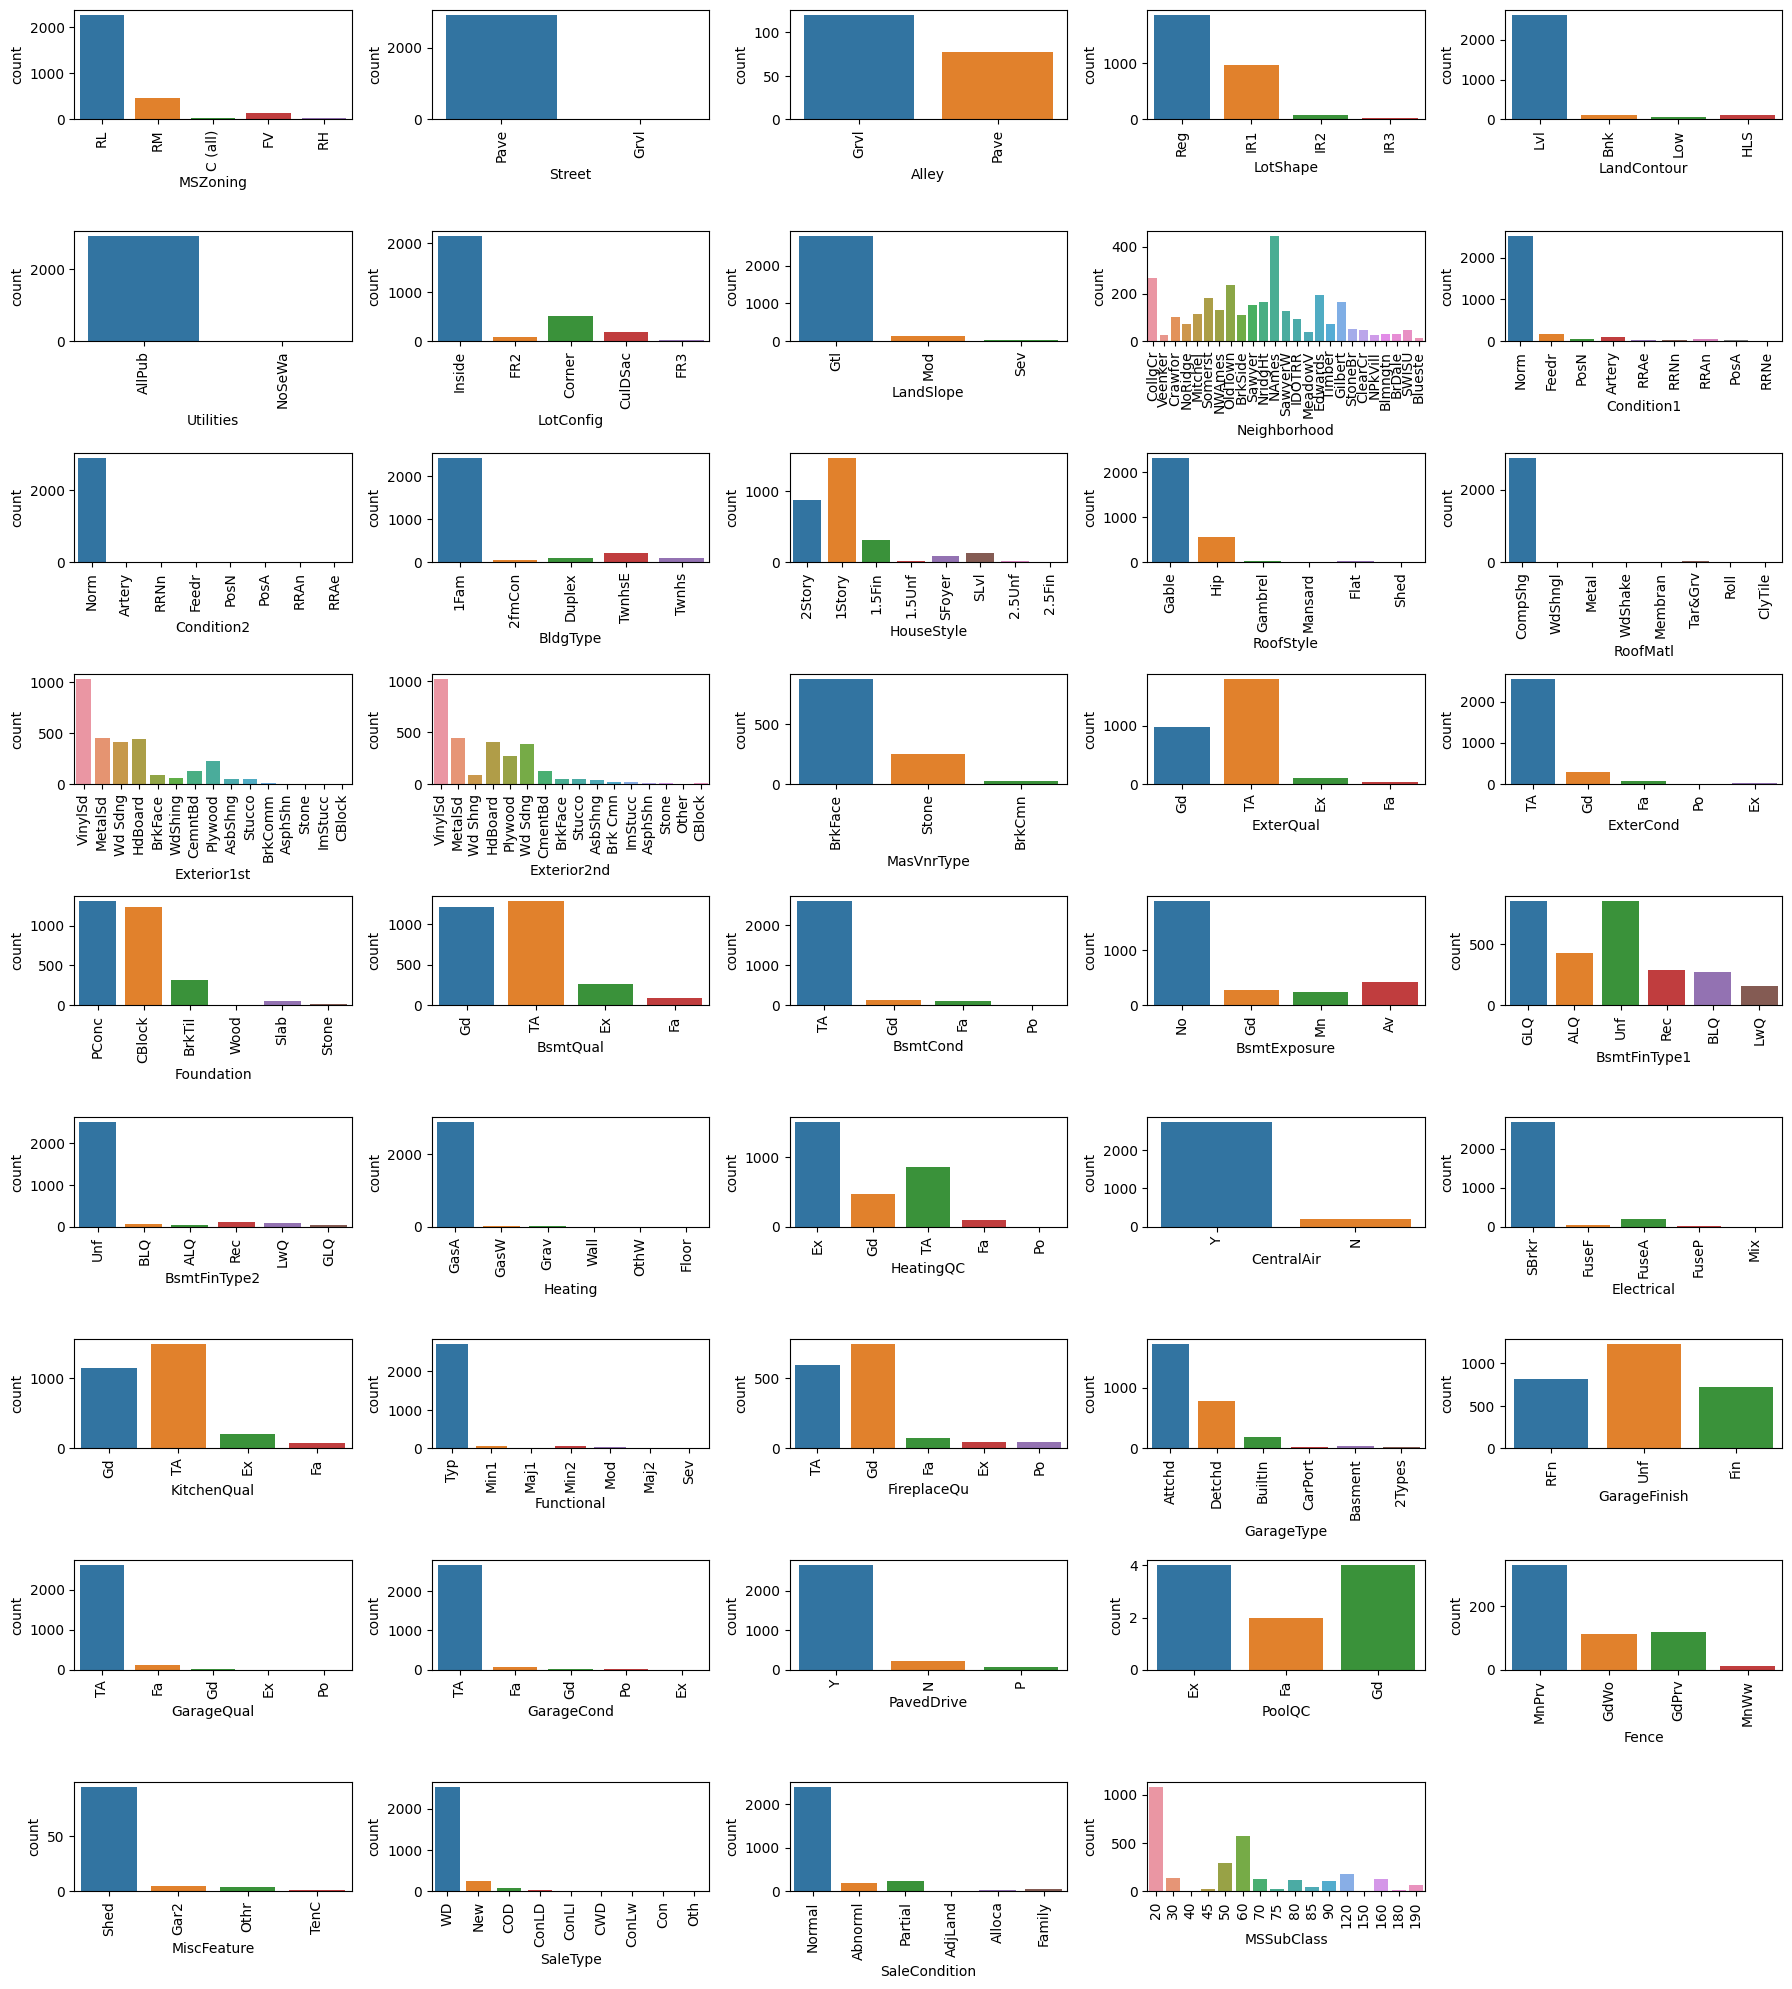

In [17]:
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_train.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_train.iloc[:,index], data=cat_train.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Again there are some columns which are stick to one value which again do not add any valuable information so we will remove them later!

## Bivariant analysis

we do bivariant analysis to find relation between the variables in term of correlation matrix, multicolinearity etc.

This was a univariant insight of the data now we will try to find the realtionship of the differnt variables in dataframe, for this we need bivariant analysis.

<Axes: >

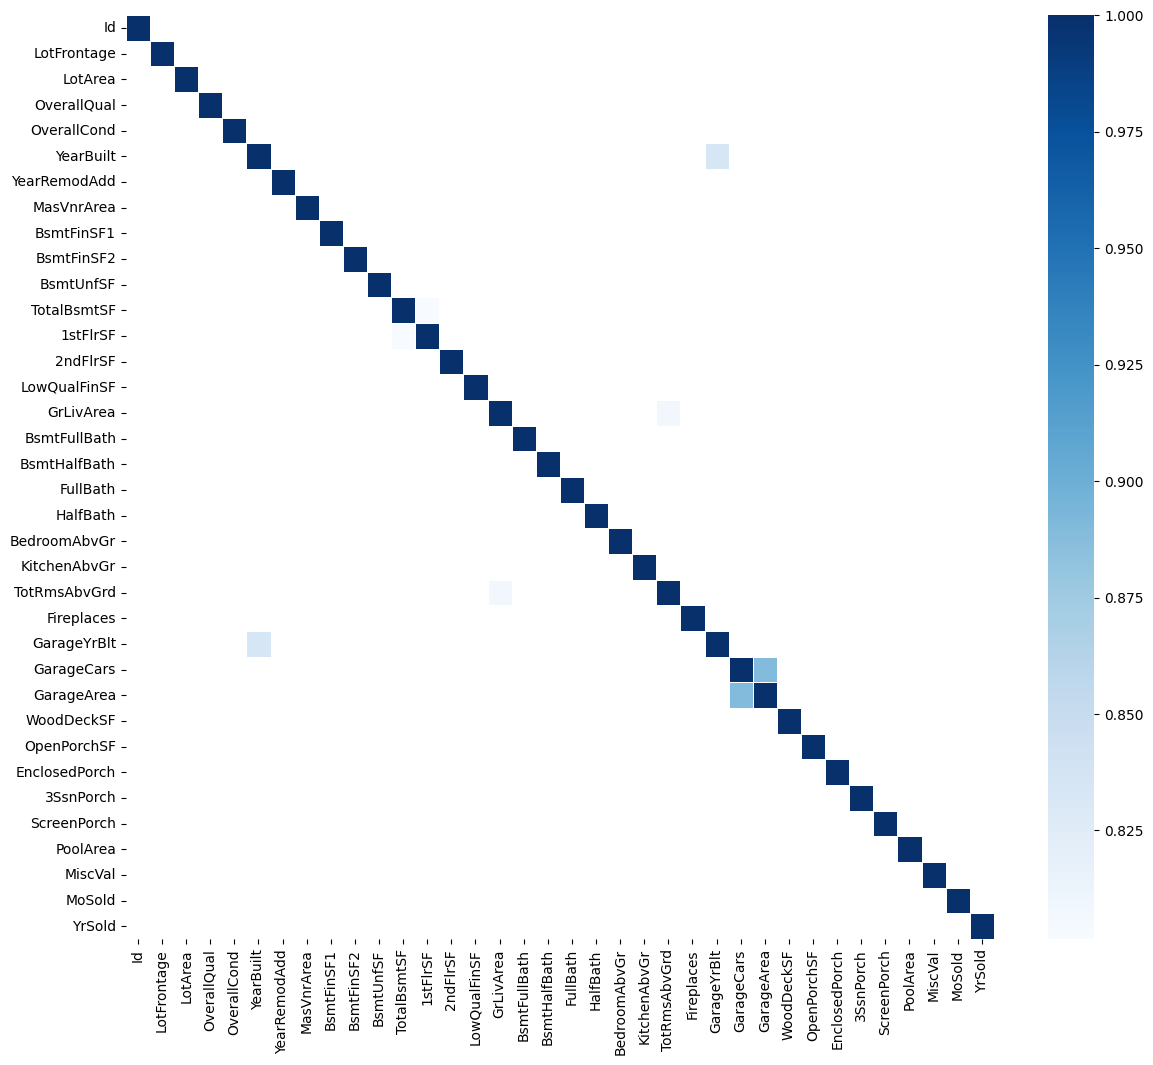

In [18]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr() 
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

As, it can be seen from the graph that there are some values which are highly correlated so we need to remove one of them to reduce the model coplexity.

The colums are highly correlated with self as shown. correlation of 1

**Relation with target variable**

Lets see if there is any variable that are linearly corelated with target feature those features will be most important feature in prediction so lets if there is any

In [19]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


The list above shows the linear relationship between the target variable and indipendednt variables and the top variable that are highly linearly related are very important for prediction of target variable.

Another way of looking at the numeric variable is to visualize the scaterplot of the columns it will help you understand if there is any other realtionship between the dependent and indipendent variables e.g Linear, Exponenetial, Quadratic etc

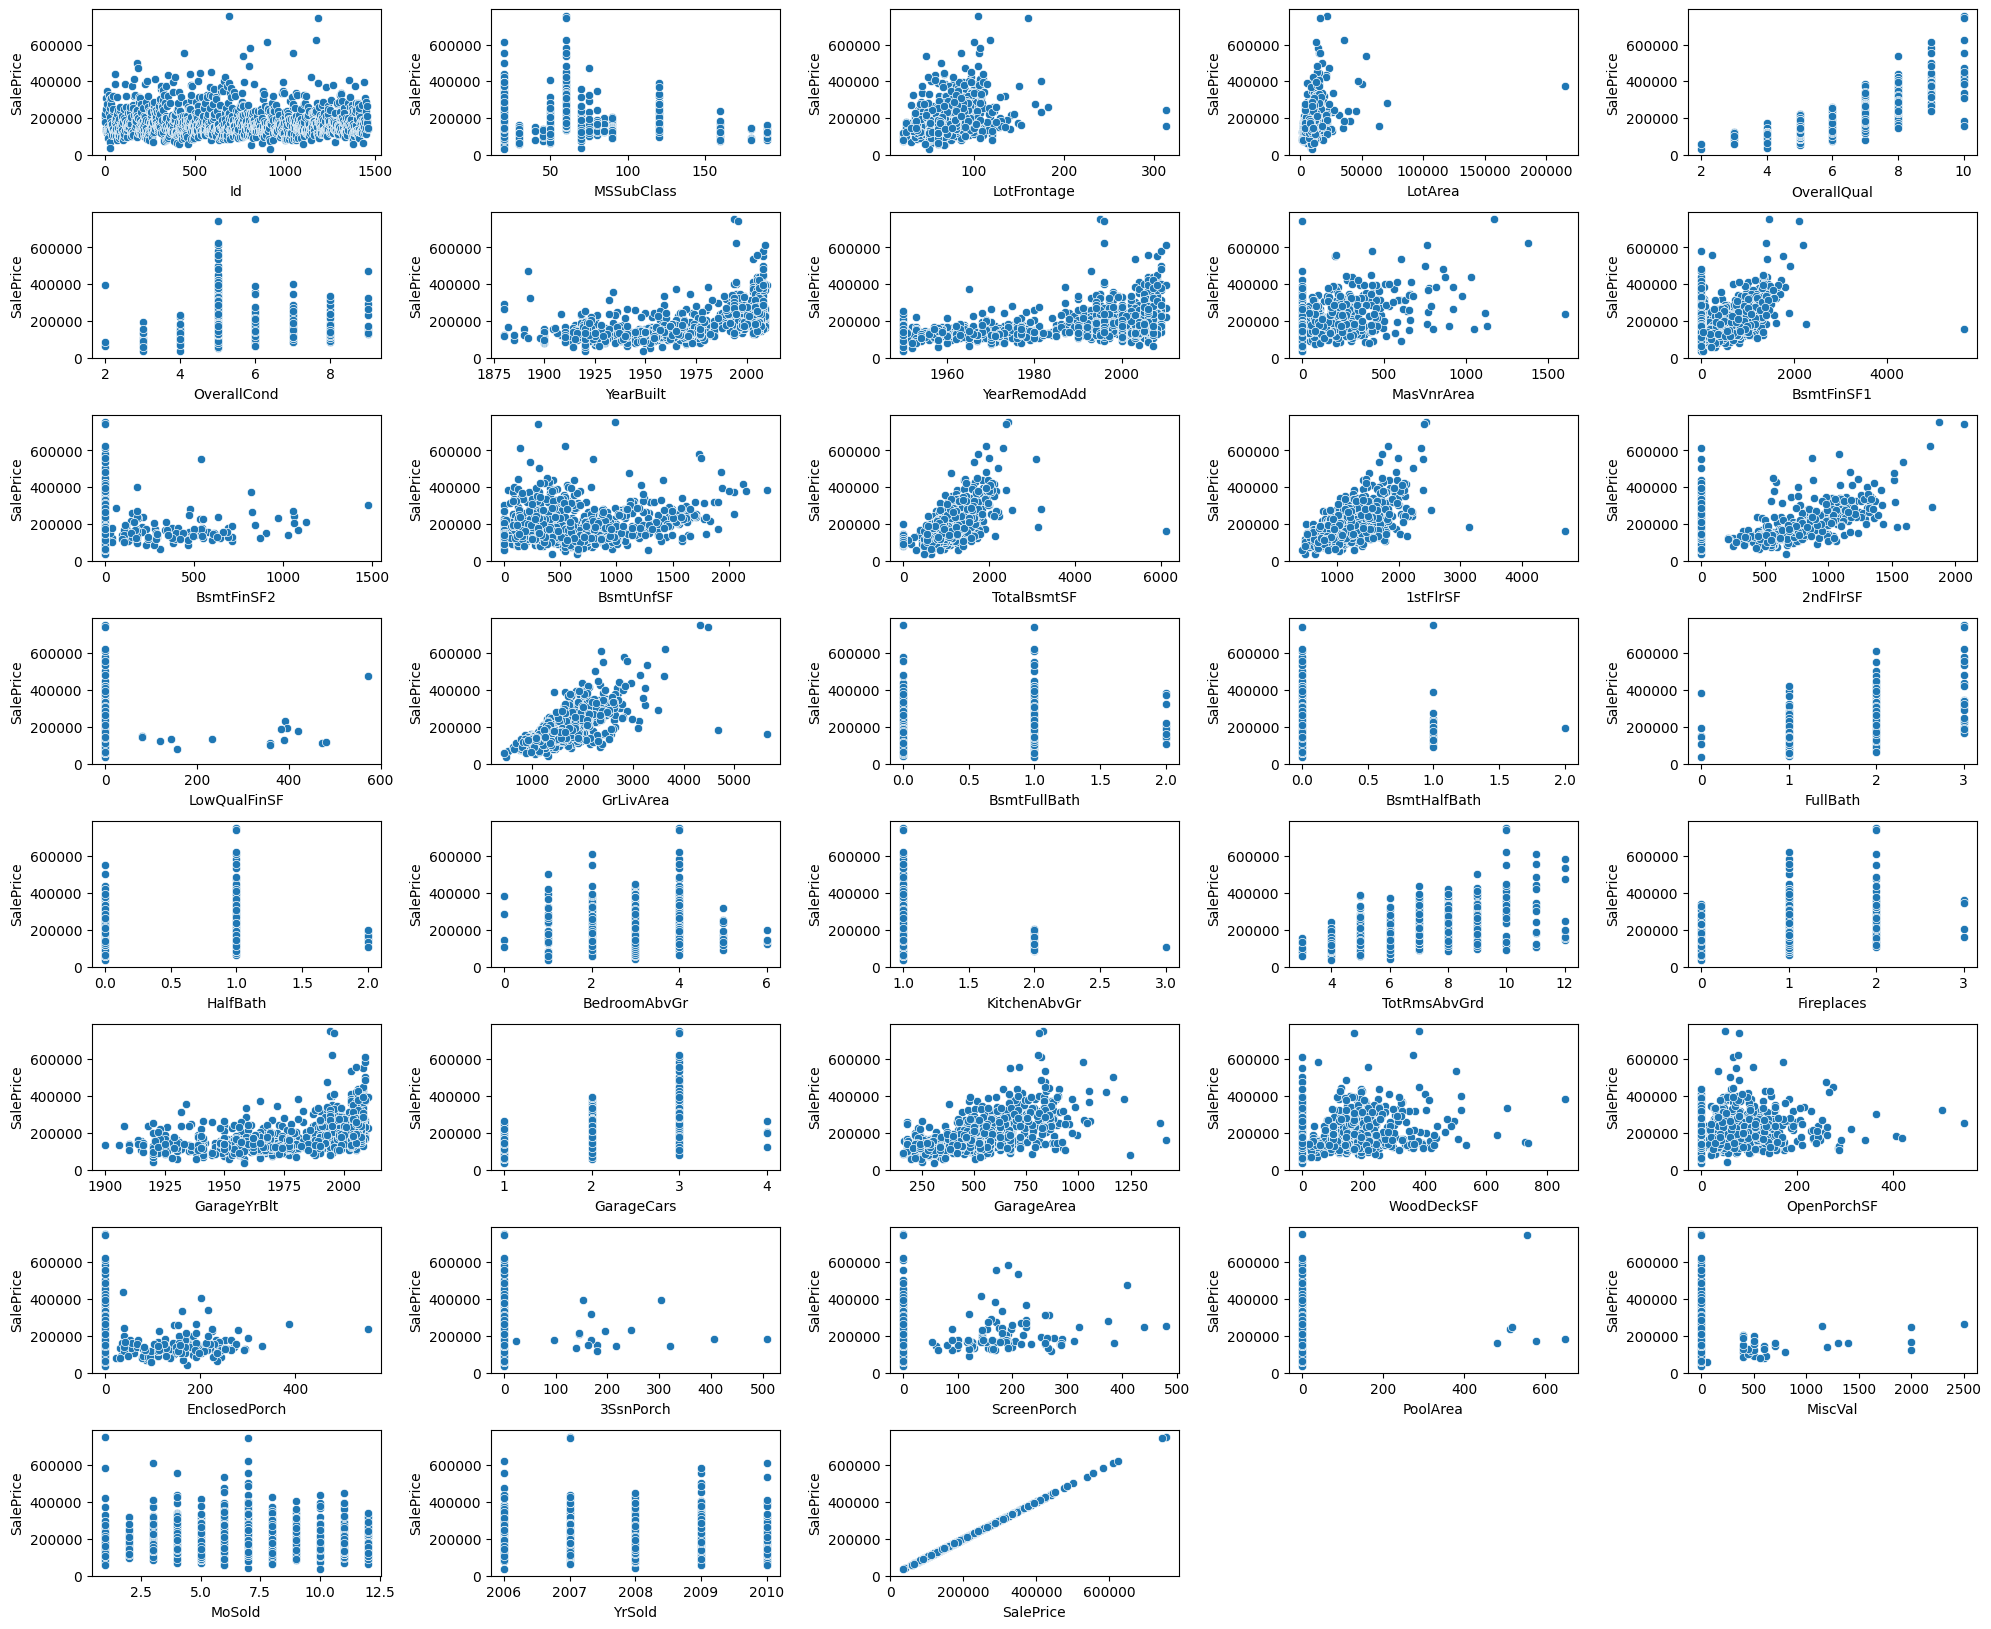

In [20]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

In [21]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 2. Data processing

So far we have completed the part of data understanding now diving into processing the data.

This section include the follwing outliines

1.  removing redundant values
2.  dealing with outliers
3.  Filling in missing values

### 2.1 removinng redundent features

From correlation matrix there are some features which are highly coorelated

1. GarageCars GarageArea       
2. GarageArea   GarageCars

In [22]:
X.drop(['GarageArea'], axis=1, inplace=True)

#### removing colums with alot missing values

Apart from correlation there are some colum which are almost empty and not giving any importantance.

Like the below diagram shows the number of empty enteries in data from left to right where
PoolQC,alley and MiscFeature are having greater zeros in it.

<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

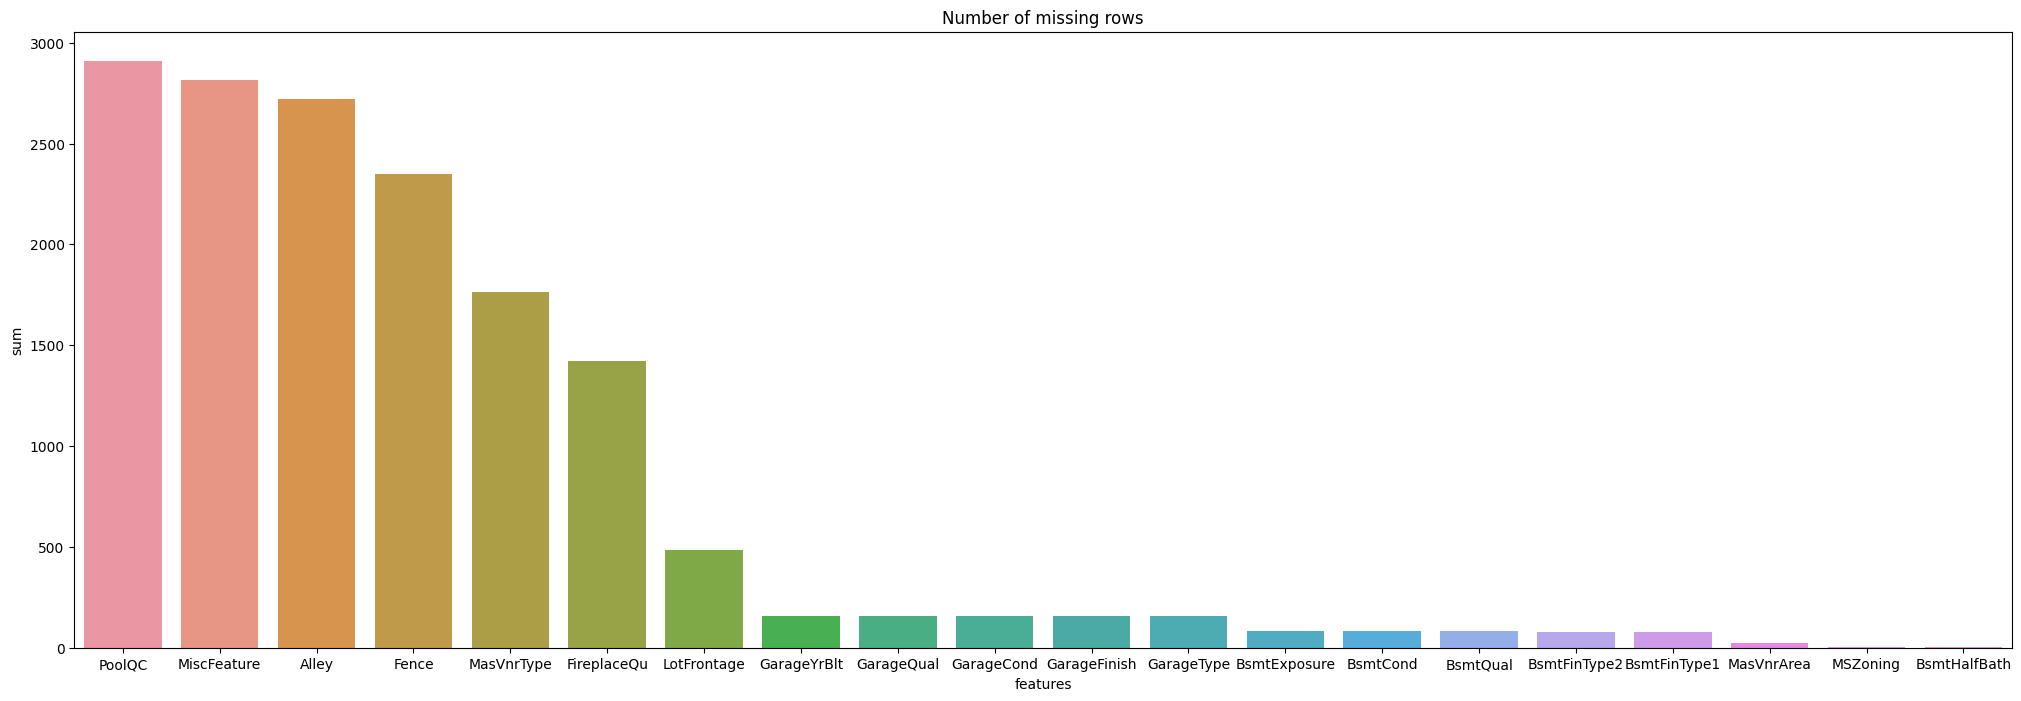

In [23]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

<Axes: >

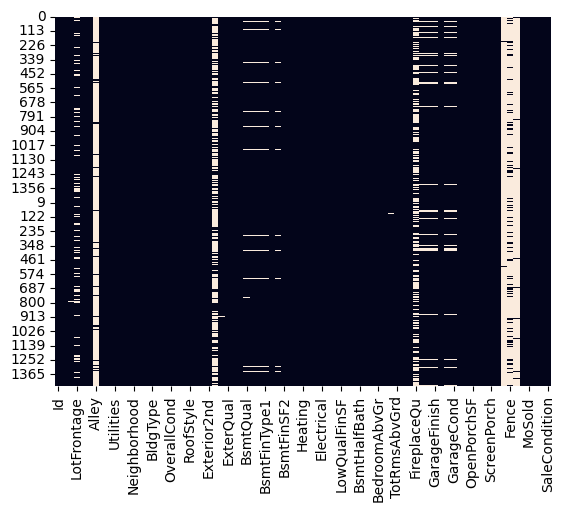

In [24]:
sns.heatmap(X.isnull(), cbar = False)

In [25]:
X.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

#### useless features

remove those feature which do not have any linear relationhsip with target column

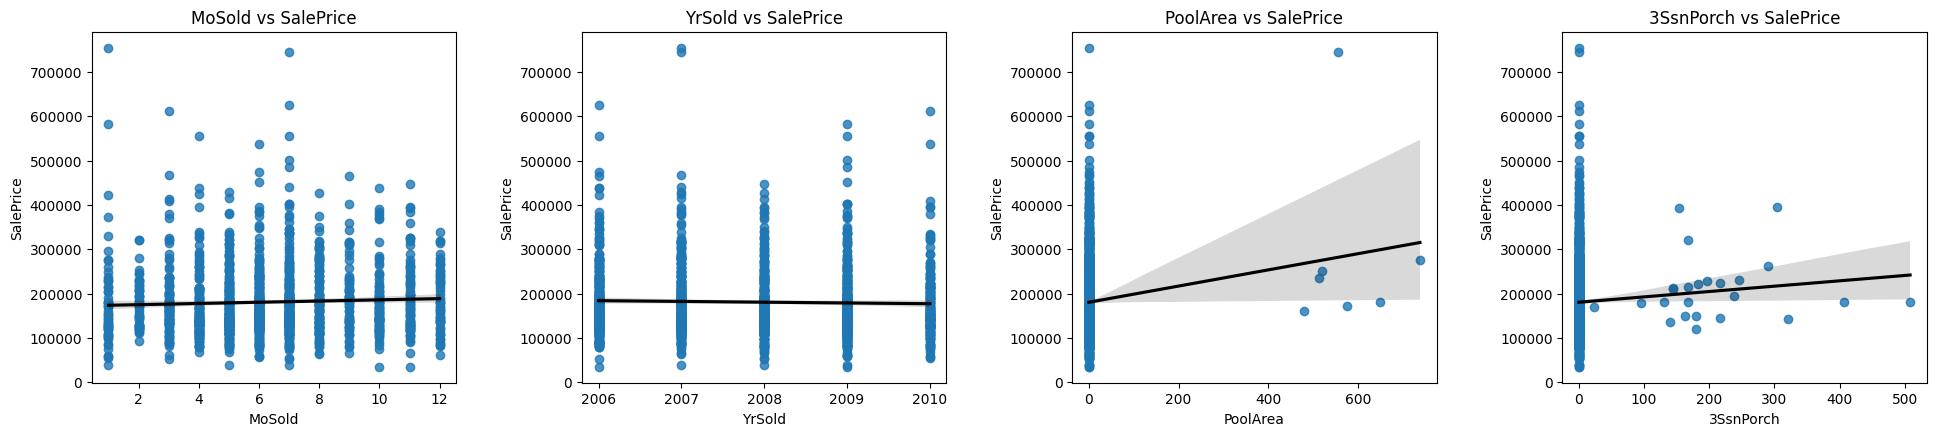

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# Plot 1
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax=axes[0], line_kws={'color': 'black'})
axes[0].set_title('MoSold vs SalePrice')

# Plot 2
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax=axes[1], line_kws={'color': 'black'})
axes[1].set_title('YrSold vs SalePrice')

# Plot 3
sns.regplot(x=numeric_train['PoolArea'], y='SalePrice', data=numeric_train, ax=axes[2], line_kws={'color': 'black'})
axes[2].set_title('PoolArea vs SalePrice')

# Plot 4
sns.regplot(x=numeric_train['3SsnPorch'], y='SalePrice', data=numeric_train, ax=axes[3], line_kws={'color': 'black'})
axes[3].set_title('3SsnPorch vs SalePrice')

fig.tight_layout(pad=3.0)
plt.show()

In [27]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)

X.drop(['MoSold','3SsnPorch','YrSold'], axis=1, inplace=True)

In [28]:
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### removing values with much single or one value
Since these kind of feature are not giving any information and also it can fool the model and overfit to training.

In [29]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
X = X.drop(overfit_cat, axis=1)

In [30]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
X = X.drop(overfit_num, axis=1)

In [31]:
print("Categorical Features with >96% of the same value: ",overfit_cat)
print("Numerical Features with >96% of the same value: ",overfit_num)

Categorical Features with >96% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numerical Features with >96% of the same value:  ['LowQualFinSF', 'PoolArea', 'MiscVal']


In [32]:
X.shape, y.shape

((2919, 64), (1460, 1))

### 2.2 Dealing with outliers
Removing outliers will prevent our models performance from being affected by extreme values.
From our boxplot earlier, we have pinpointed the following features with extreme outliers:

* LotFrontage
* LotArea
* BsmtFinSF2
* BsmtFinSF
* GrLivArea
* MasVnrArea
* LowQualFinSF
* GarageArea
* 3SsnPorch
* ScreenPorch
* MiscVal


We will remove the outliers based on certain threshold value.

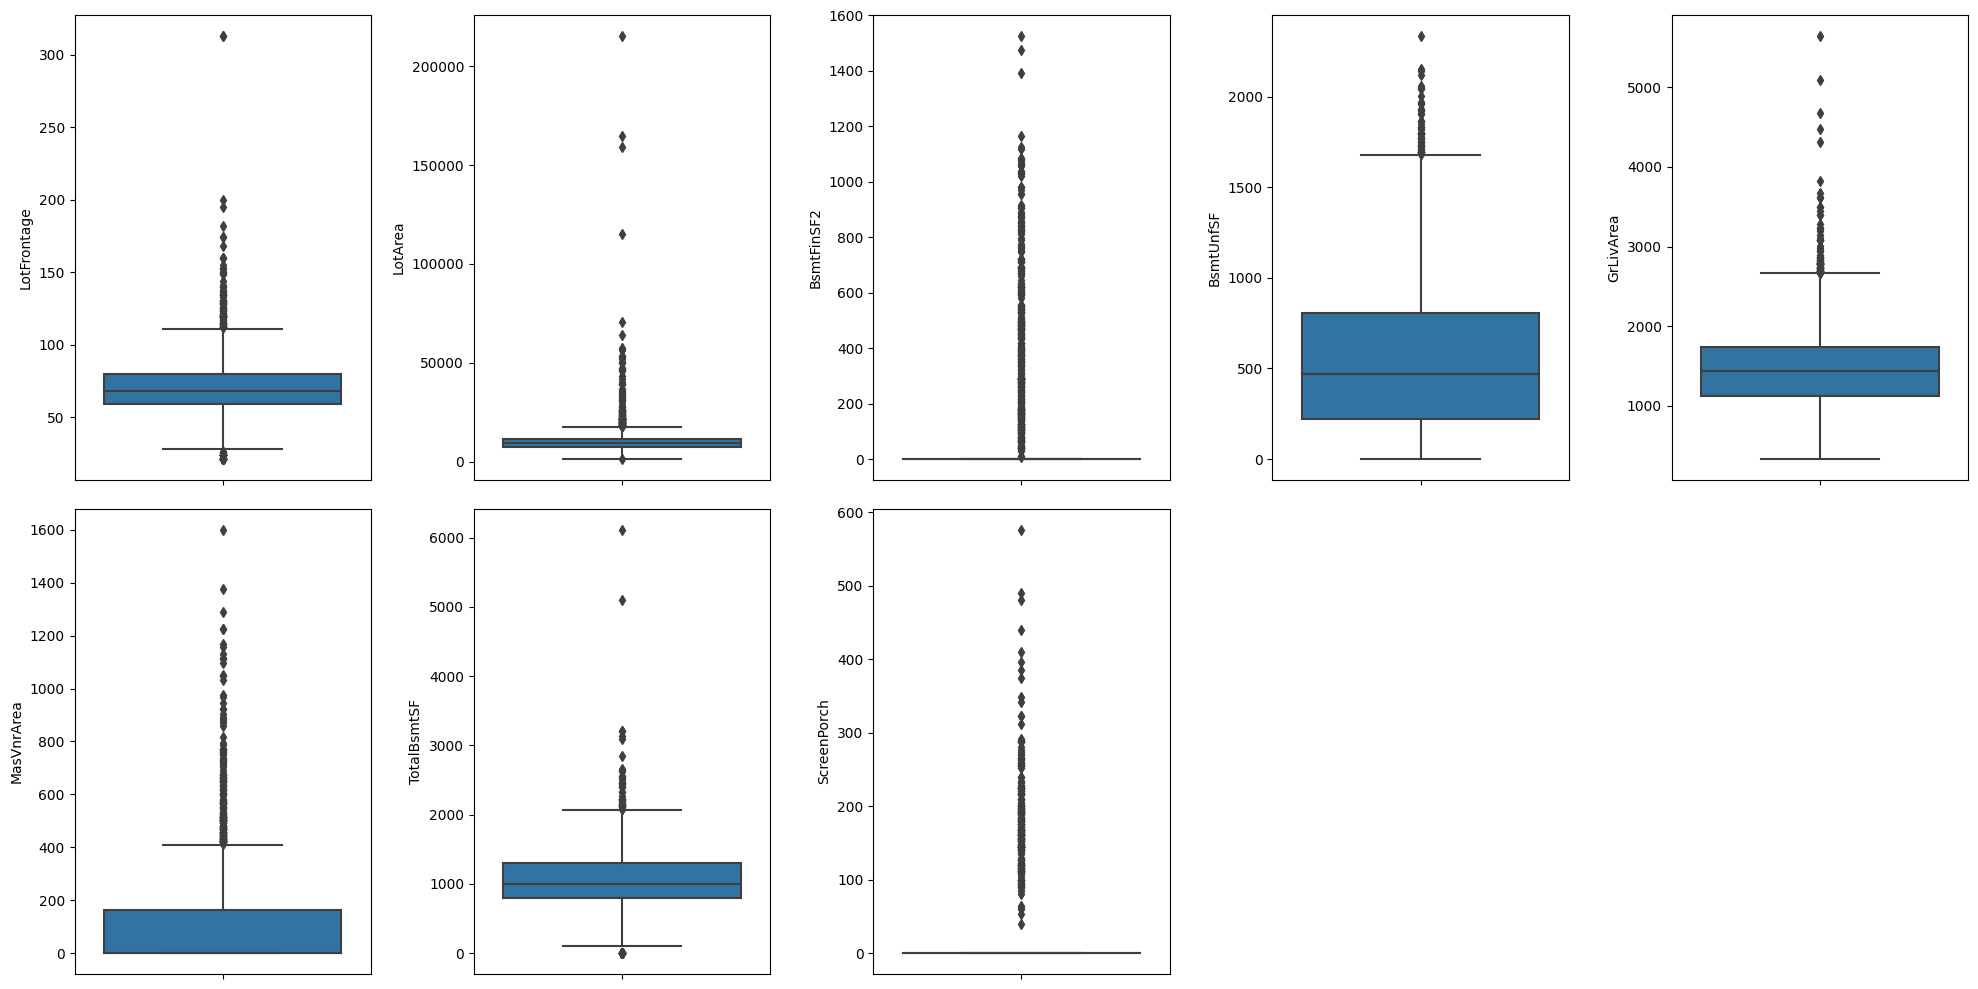

In [33]:
out_col = ['LotFrontage', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'MasVnrArea', 'TotalBsmtSF','ScreenPorch']
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(out_col):
    plt.subplot(3,5,index+1)
    sns.boxplot(y=col, data=X)
fig.tight_layout(pad=1.5)

In [34]:
def find_percentage_of_outliers(df, column_name):
    column = df[column_name]
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #count the percentage of outliers
    outliers_count = ((column < lower_bound) | (column > upper_bound)).sum()
    percentage_outliers = (outliers_count / len(column)) * 100
    
    #impute outliers using mean
    outliers = (column < lower_bound) | (column > upper_bound)
    mean_value = column.mean()
    df[column_name] = np.where(outliers, mean_value, column)
    return percentage_outliers


out_col = ['LotFrontage', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'MasVnrArea', 'TotalBsmtSF','ScreenPorch']
for column_name in out_col:
    percentage_outliers = find_percentage_of_outliers(X, column_name)
    print(f"Percentage of outliers in '{column_name}': {percentage_outliers:.2f}%")


Percentage of outliers in 'LotFrontage': 6.78%
Percentage of outliers in 'LotArea': 4.39%
Percentage of outliers in 'BsmtFinSF2': 11.89%
Percentage of outliers in 'BsmtUnfSF': 1.82%
Percentage of outliers in 'GrLivArea': 2.54%
Percentage of outliers in 'MasVnrArea': 6.85%
Percentage of outliers in 'TotalBsmtSF': 4.18%
Percentage of outliers in 'ScreenPorch': 8.77%


In [35]:
train.shape

(1460, 81)

In [36]:
# train = train.drop(train[train['LotFrontage'] > 200].index)
# train = train.drop(train[train['LotArea'] > 100000].index)
# train = train.drop(train[train['BsmtFinSF2'] > 4000].index)
# train = train.drop(train[train['BsmtUnfSF'] > 200].index)
# train = train.drop(train[train['GrLivArea'] > 4000].index)
# train = train.drop(train[train['MasVnrArea'] > 100000].index)
# train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
# train = train.drop(train[train['ScreenPorch'] > 4000].index)


In [37]:
train.shape

(1460, 81)

In [38]:
X.shape,y.shape

((2919, 64), (1460, 1))

### 2.3 Filling missing values
Since our ML models are not able to deal with the missing values in data frame so we need to remove or fill these vaues somehow so that there is no missing values exits.

In [39]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

,sum
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageCond,159
GarageFinish,159
GarageYrBlt,159
GarageType,157
BsmtCond,82
BsmtExposure,82


#### Ordinal encoding

We will replace the ordinal missing values with NA, which will be mapped later on when we encode them into an ordered arrangement

In [40]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

X[cat] = X[cat].fillna("NA")

### Categorical features
We will replace the missing value of our categorical features with the most frequent occurrence (mode) of the individual features.

Text(0, 0.5, 'Number of houses')

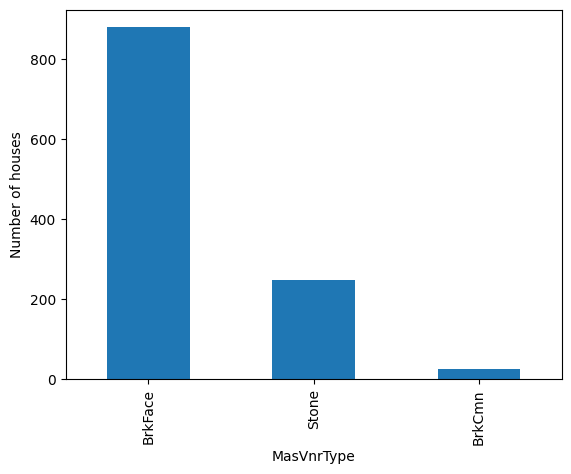

In [41]:
# value_counts() counts the amount of houses that show each of the labels in the variable indicated below
X['MasVnrType'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('MasVnrType')
plt.ylabel('Number of houses')

In [42]:
#categorical
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
X[cols] = X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode().iloc[0]))


#### Numerical features
For Numerical Features, the common approach will be to replace the missing value with the mean of the feature distribution.
However, certain features like LotFrontage have wide variance in their distribution. Taking mean values across Neighborhoods, we will see that the mean varies alot from just taking the mean value of these individual column, since each neightborhood have different LotFrontage mean value. Hence, i decided to group these features by Neighborhoods to impute the respective mean values.

Note: My initial approach was based on the means of both train and test set. This exposed us to the issue of data leakage, where information from the test set is used to compute mean values. The right way to do it will be to impute solely based on the mean of the train data.



In [43]:
print("Mean of LotFrontage: ", X['LotFrontage'].mean())

Mean of LotFrontage:  68.78731914190566


<Axes: xlabel='Neighborhood', ylabel='LotFrontage_mean'>

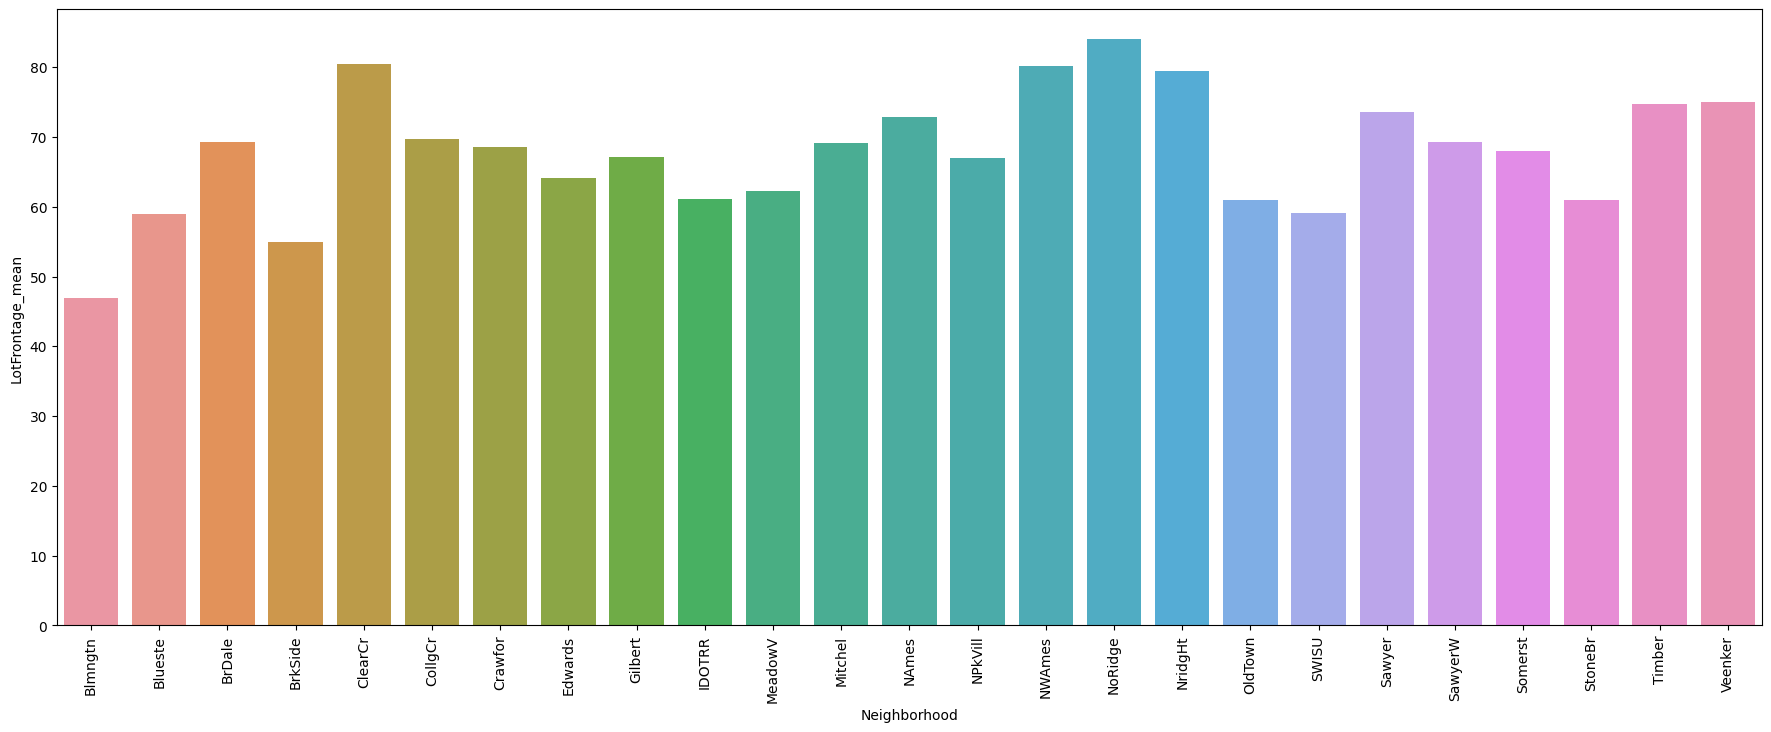

In [44]:
neigh_lot = X.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage_mean')

fig, axes = plt.subplots(figsize=(22,8))
axes.tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='LotFrontage_mean', data=neigh_lot, ax=axes)

In [45]:
#for correlated relationship
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#numerical
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont] = X[cont].fillna(X[cont].mean())

#### Changing Data Type
Since MSSubClass is an integer column based on some mapped values in string notation, we change its data type to string value instead

In [46]:
X['MSSubClass'] = X['MSSubClass'].apply(str)

**Mapping Ordinal Features**

There are some columns which are ordinal by nature, which represents the quality or condition of certain housing features. In this case, we will map the respective strings to a value. The better the quality, the higher the value

In [47]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}

In [48]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)


After removing the outliers, highly correlated features and imputing missing values, we can now proceed with adding additional information for our model to train on. This is done by the means of - Feature Engineering.

In [49]:
X.shape,y.shape

((2919, 64), (1460, 1))

# feature engineering
Feature Engineering is a technique by which we create new features, modify exiting features, drop features, concate features that could potentially aid in predicting our target variable, which in this case, is SalePrice. In this notebook, we will create additional features based on our Domain Knowledge of the housing features

Based on the current feature we have, the first additional featuire we can add would be TotalLot, which sums up both the LotFrontage and LotArea to identify the total area of land available as lot. We can also calculate the total number of surface area of the house, TotalSF by adding the area from basement and 2nd floor. TotalBath can also be used to tell us in total how many bathrooms are there in the house. We can also add all the different types of porches around the house and generalise into a total porch area, TotalPorch.

* TotalLot = LotFrontage + LotArea
* TotalSF = TotalBsmtSF + 2ndFlrSF
* TotalBath = FullBath + HalfBath
* TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch
* TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

In [50]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

#### Binay Columns
We also include simple feature engineering by creating binary columns for some features that can indicate the **presence(1) / absence(0**) of some features of the house

In [51]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in colum:
    col_name = col+'_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)

#### Converting Categorical to Numerical
Lastly, because machine learning only learns from data that is numerical in nature, we will convert the remaining categorical columns into one-hot features using the get_dummies() method into numerical columns that is suitable for feeding into our machine learning algorithm.

In [52]:
X = pd.get_dummies(X)

**Sales price distribution**

/tmp/ipykernel_19/3242858411.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(train['SalePrice'],norm_hist=False)


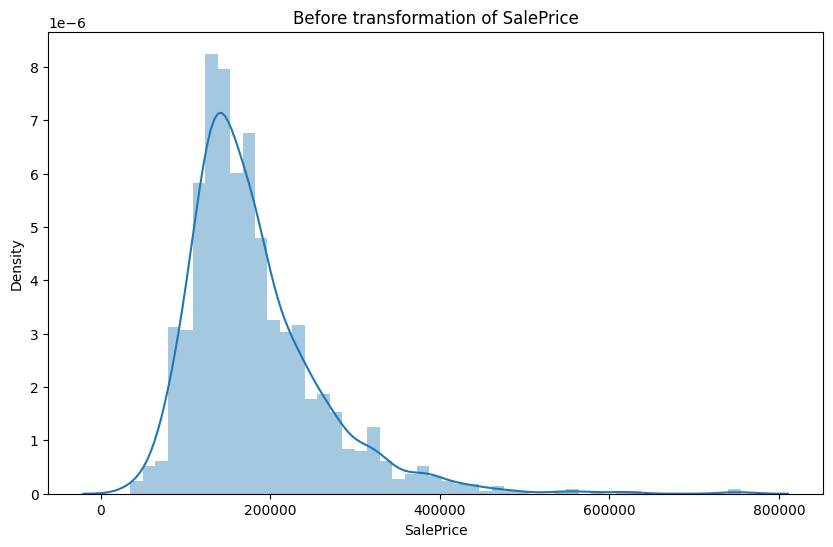

In [53]:
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(train['SalePrice'],norm_hist=False)

Since the data is skewed towrd the right which is also called positive skewness where the long tails is at right right which also a representation of having mean is greater than its mode. So it will effect the performance of our machine learning model so we need to fix it by removing the skewness in the data by applying **log transformation**.

/tmp/ipykernel_19/1692972096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)


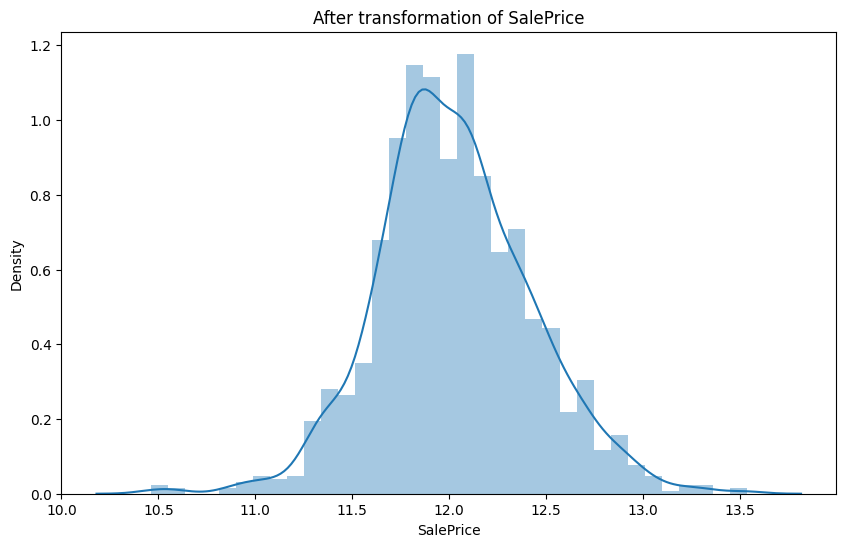

In [54]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)

In [55]:
y["SalePrice"] = np.log(y['SalePrice'])

/tmp/ipykernel_19/3620818092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["SalePrice"] = np.log(y['SalePrice'])


# 4. Modeling
This section will consist of scaling the data for better optimization in our training, and also introducing the varieties of ensembling methods that are used in this notebook for predicting the Housing price. We also try out hyperparameter tuning briefly, as i will be dedicating a new notebook that will explain more in details on the process of Hyperparameter Tuning as well as the mathematical aspect of the ensemble algorithms.

#### train test and validation split

In [56]:
X.shape,y.shape

((2919, 225), (1460, 1))

In [57]:
#x2 = X.loc[train.index]
#y2 = y.loc[train.index]
#test2 = X.loc[test.index]

In [58]:
# Assuming X contains both train and test data
train_rows = len(train)
train_X = X.iloc[:train_rows, :]
test_X = X.iloc[train_rows:, :]


In [59]:
train_X.shape,test_X.shape,y.shape

((1460, 225), (1459, 225), (1460, 1))

#### Scaling of data
**RobustScaler** is a transformation technique that removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). It is also robust to outliers, which makes it ideal for data where there are too many outliers that will drastically reduce the number of training data.

Previously i fitted the RobustScaler on both Train and Test set, and that is a mistake on my side. By fitting the scaler on both train and testset, we exposed ourselves to the problem of **Data Leakage**. Data Leakage is a problem when information from outside the training dataset is used to create the model. If we fit the scaler on both training and test data, our training data characteristics will contain the distribution of our testset. As such, we are unknowningly passing in information about our test data into the final training data for training, which will not give us the opportunity to truly test our model on data it has never seen before

**Lesson Learnt:** Fit the scaler just on training data, and then transforming it on both training and test data

#### Enasamble algorithm


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_X, y, test_size=0.2, random_state=2020)

In [61]:
from sklearn.preprocessing import RobustScaler

cols = X_train.select_dtypes(np.number).columns
transformer = RobustScaler().fit(X_train[cols])
train_X[cols] = transformer.transform(train_X[cols])
test_X[cols] = transformer.transform(test_X[cols])

/tmp/ipykernel_19/2240376242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[cols] = transformer.transform(train_X[cols])
/tmp/ipykernel_19/2240376242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[cols] = transformer.transform(test_X[cols])


#### Ensamble models.
Ensembling methods are meta-algorithms which involves combining several machine learning models into one predictive model, aim at decreasing variance(reduce overfitting) and improving bias(improve accuracy).
The 3 main ensembling methods are **Bagging, Boosting and Stacking**.
In this notebook, we will focus mainly on Boosting, which is what we will be using for our prediction.

**Boosting** works on a class of weak learners, improving them into strong learners. It is being improved sequentially where the misclassified instances will be given more weights so that during the subsequent training, the learner will place more emphasis in correcting the previously misclassfied instance, less so on the already correctly identified instances. Over time, the eventual learner will possess the ability to predict accurately as a result of learning from past mistakes

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

**XGBoost**

Extreme Gradient Boost (XGB) is a boosting algorithm that uses the gradient boosting framework; where gradient descent algorithm is employed to minimize the errors in the sequential model. It improves on the gradient boosting framework with faster execution speed and improved performance.

In [63]:
'''
Find out more on the XGBRegressor implementation and parameters at 
https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
'''

# xgb = XGBRegressor(booster='gbtree', learning_rate=0.3, n_estimators=3460,
#                     max_depth=6, min_child_weight=1, subsample=1,
#                     gamma=0, reg_alpha = 0.001, colsample_bytree=0.7,
#                     objective='reg:squarederror', reg_lambda = 0.001,
#                     scale_pos_weight=1, seed=2020)

xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [64]:
from sklearn.model_selection import RandomizedSearchCV

param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)
       
xgb_search = xgb_reg.fit(X_train, y_train)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

In [65]:
best_param

{'reg_lambda': 0.1,
 'reg_alpha': 0.1,
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.1}

* Training and Evaluation

In [66]:
def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

xgb.fit(X_train, y_train)   
preds = xgb.predict(X_val) 


In [67]:
preds_test_xgb = xgb.predict(test_X)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, train_X, y)

In [68]:
model_performances = pd.DataFrame({
    "Model" : ["XGBoost"],
    "CV(5)" : [str(cv_xgb)[0:5]],
    "MAE" : [str(mae_xgb)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5]],
    "Score" : [str(score_xgb)[0:5]] })

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

Sorted by Score:
     Model  CV(5)    MAE   RMSE  Score
0  XGBoost  0.902  0.078  0.105  0.936


In [69]:
subm = np.exp(xgb.predict(test_X))

# Assuming 1060 is the starting value for the "Id" column
start_id = 1461

# Create the submission DataFrame
submission = pd.DataFrame({'Id': range(start_id, start_id + len(test_X)),
                            'SalePrice': subm})

submission.to_csv("../../kaggle/working/submission.csv", index=False)

Resources that i uses

https://www.kaggle.com/code/angqx95/data-science-workflow-top-2-with-tuning
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
https://medium.com/cracking-the-data-science-interview/the-10-statistical-techniques-data-scientists-need-to-master-1ef6dbd531f7 https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/




https://www.kaggle.com/code/masumrumi/a-detailed-regression-guide-with-house-pricing
#https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners
https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1
